In [ ]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

In [ ]:
import numpy as np
import pandas as pd
import re,string, unicodedata
from pprint import pprint
import preprocessor as p
import nltk
import inflect
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import html

In [ ]:
emoticons_happy = {':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D', '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P', 'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'}
emoticons_sad = {':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<', ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c', ':c', ':{', '>:\\', ';('}
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)
# emoticons = emoticons_happy.union(emoticons_sad)

def extract_hashtags(text):
    topics=re.findall(r"#\w+", text)
    if topics:
        topics=[x.replace('#', '') for x in topics]
    return topics
def extract_mentions(text):
    mentions= re.findall(r"@\w+", text)
    if mentions:
        mentions=[x.replace('@', '') for x in mentions]
    return mentions
def remove_html(text):
    '''Remove message with htm and special char'''
    text=re.sub(r':', '', text)
    text=re.sub(r'‚Ä¶', '', text)
    return re.sub(r'^<p.*</p>', '', text)


def remove_hashtags(text):
    return re.sub(r"#\w+", '', text)

def remove_mentions(text):
    return re.sub(r"@\w+", '', text)   

def remove_URL(text):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", text)

def remove_emojis(text):
    return emoji_pattern.sub(r'', text)

def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in text]

def to_lowercase(text):
    """Convert all characters to lowercase from list of tokenized words"""
    return [word.lower() for word in text]

def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    return [re.sub(r'[^\w\s]', '', word) for word in text]

def replace_numbers(text):
    """Replace all integer occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    return [p.number_to_words(word) if word.isdigit() else word for word in text]

def remove_stopwords(text):
    """Remove stop words from list of tokenized words"""
    return [word for word in text if word not in stopwords.words('english')]

def stem_words(text):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    return [stemmer.stem(word) for word in text]


def lemmatize_verbs(text):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word, pos='v') for word in text]

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    # Remove space
    words = ' '.join(words).replace('  ', ' ').strip().split(' ')
    try: 
        words.remove('')
    except:
        pass 
   
    return words
def preprocess(text):
    text=html.unescape(text)
    text = remove_html(text)
    text = remove_URL(text)
    text= remove_hashtags(text)
    text= remove_mentions(text)
    # Tokenize
    words = nltk.word_tokenize(text)
    # Normalize
    words = normalize(words)
    #return sample
    return ' '.join(words)
def easy_clean(text):
    text=html.unescape(text)
    text=p.clean(text)    
    text=re.sub(r"#\w+", '', text)
    text=re.sub(r"@\w+", '', text)
    return text.strip()   

In [ ]:
df = pd.read_csv("../data/sample.csv")
df.head()

In [ ]:
df.columns

In [ ]:
df["mentions"]=df["Tweet Content"].apply(extract_mentions)
df["hashtags"]=df["Tweet Content"].apply(extract_hashtags)
df["preprocessed"]=df["Tweet Content"].apply(preprocess)
df["cleaned"]=df["Tweet Content"].apply(easy_clean)

In [ ]:
test_text=df["Tweet Content"][0]
pprint(test_text)
pprint(easy_clean(test_text))
pprint(preprocess(test_text))
sent=nltk.word_tokenize(easy_clean(test_text))
sent = nltk.pos_tag(sent)
pprint(sent)
sid = SentimentIntensityAnalyzer()
ss=sid.polarity_scores(easy_clean(test_text))
ss

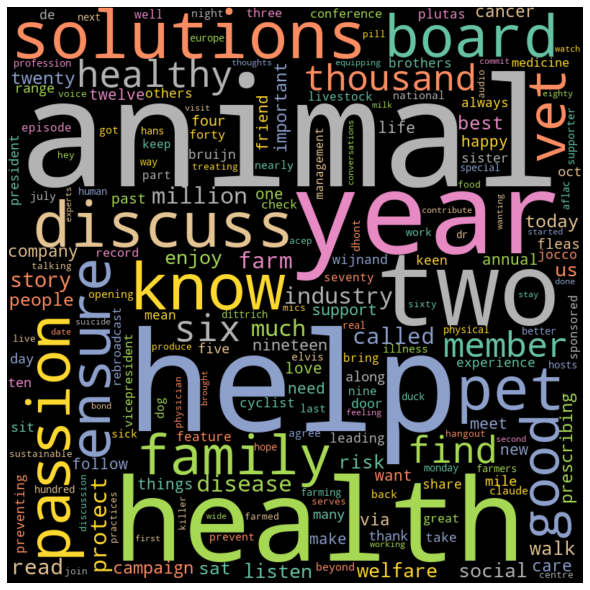

In [115]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
def make_wordcloud(new_text):
    ''''funciton to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                min_font_size = 10,
                background_color='black', 
                colormap='Set2', 
                collocations=False,
                prefer_horizontal=0.9).generate(new_text) 
    
    #wordcloud.recolor(color_func = grey_color_func)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.imshow(wordcloud, interpolation='bilinear')
make_wordcloud(' '.join(df["preprocessed"]))

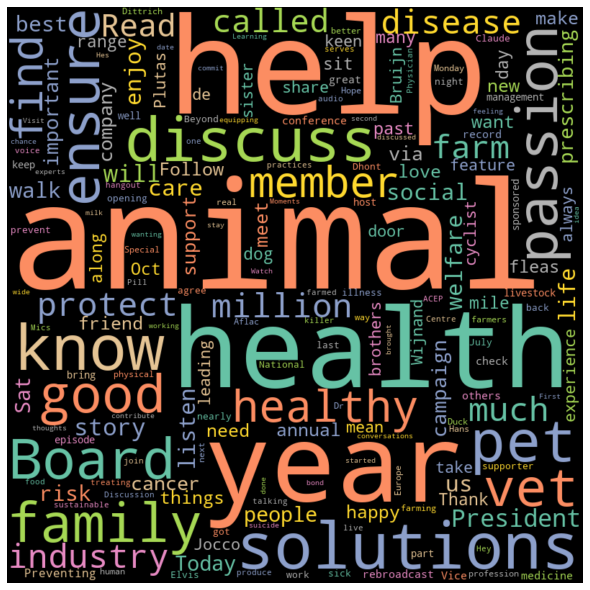

In [116]:
make_wordcloud(' '.join(df["cleaned"]))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 